In [ ]:
#Import required libraries 
import pandas as pd
import nltk
from nltk import pos_tag
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


# Read the .csv file using Pandas. Take a look at the top few records.


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/AI_ML_Engineer/Projects/Natural Language Processing NLP/Project_2_Topic_Analysis_review_data/K8 Reviews v0.2.csv')
print(df.head())
print(df.shape)

   sentiment                                             review
0          1             Good but need updates and improvements
1          0  Worst mobile i have bought ever, Battery is dr...
2          1  when I will get my 10% cash back.... its alrea...
3          1                                               Good
4          0  The worst phone everThey have changed the last...
(14675, 2)


#Normalize casings for the review text and extract the text into a list for easier manipulation.


In [ ]:
df['review'] = df.iloc[:,1].str.lower()

In [ ]:
df['review']

0                   good but need updates and improvements
1        worst mobile i have bought ever, battery is dr...
2        when i will get my 10% cash back.... its alrea...
3                                                     good
4        the worst phone everthey have changed the last...
                               ...                        
14670    i really like the phone, everything is working...
14671    the lenovo k8 note is awesome. it takes best p...
14672                         awesome gaget.. @ this price
14673    this phone is nice processing will be successf...
14674        good product but the pakeging was not enough.
Name: review, Length: 14675, dtype: object

In [ ]:
# convert pandas dataframe in to a list
reviews = df['review'].tolist()

In [ ]:
print(reviews[0:1])

['good but need updates and improvements']


#Tokenize the reviews using NLTKs word_tokenize function.



In [ ]:
tokens = [word_tokenize(i) for i in reviews]


In [ ]:
print(tokens[0:1])

[['good', 'but', 'need', 'updates', 'and', 'improvements']]


#Perform parts-of-speech tagging on each sentence using the NLTK POS tagger.



In [ ]:
s = df['review']
tagged_sent = pos_tag(s)
 
 

In [ ]:
print(tagged_sent)

[('good but need updates and improvements', 'NNS'), ("worst mobile i have bought ever, battery is draining like hell, backup is only 6 to 7 hours with internet uses, even if i put mobile idle its getting discharged.this is biggest lie from amazon & lenove which is not at all expected, they are making full by saying that battery is 4000mah & booster charger is fake, it takes at least 4 to 5 hours to be fully charged.don't know how lenovo will survive by making full of us.please don;t go for this else you will regret like me.", 'WRB'), ('when i will get my 10% cash back.... its already 15 january..', 'NN'), ('good', 'JJ'), ('the worst phone everthey have changed the last phone but the problem is still same and the amazon is not returning the phone .highly disappointing of amazon', 'NN'), ("only i'm telling don't buyi'm totally disappointedpoor batterypoor camerawaste of money", 'NN'), ('phone is awesome. but while charging, it heats up allot..really a genuine reason to hate lenovo k8 not

#For the topic model, we should  want to include only nouns.

##Find out all the POS tags that correspond to nouns.



In [ ]:
print(type(tagged_sent))
print(len(tagged_sent))
print(tagged_sent[2])
print(tagged_sent[2][1])

POS_nouns = []

for sent in tagged_sent:
    if sent[1].startswith("NN"):
        temp = sent[0]
        POS_nouns.append(temp)
    
     

<class 'list'>
14675
('when i will get my 10% cash back.... its already 15 january..', 'NN')
NN


In [ ]:
len(POS_nouns)
print(POS_nouns)

['good but need updates and improvements', 'when i will get my 10% cash back.... its already 15 january..', 'the worst phone everthey have changed the last phone but the problem is still same and the amazon is not returning the phone .highly disappointing of amazon', "only i'm telling don't buyi'm totally disappointedpoor batterypoor camerawaste of money", 'a lot of glitches dont buy this thing better go for some other options', "don't purchase this item, it is so much of heating &battery life is very poor", 'i have faced the battery problem and motherboard problem with in 8 months. this is the worst mobile in my life.', 'very good phone slim good battry backup good screen love it', 'every time automatic on and off so kindly suggest me what i can do', "best product according to their prize range and it's specification comparison to another mobile(under range) and i had bought this phone during amazon seal so i had 2 paid only 10,999 but i have also hdpf credit card in which i was to pa

##Limit the data to only terms with these tags.

In [ ]:
POS_nouns

['good but need updates and improvements',
 'when i will get my 10% cash back.... its already 15 january..',
 'the worst phone everthey have changed the last phone but the problem is still same and the amazon is not returning the phone .highly disappointing of amazon',
 "only i'm telling don't buyi'm totally disappointedpoor batterypoor camerawaste of money",
 'a lot of glitches dont buy this thing better go for some other options',
 "don't purchase this item, it is so much of heating &battery life is very poor",
 'i have faced the battery problem and motherboard problem with in 8 months. this is the worst mobile in my life.',
 'very good phone slim good battry backup good screen love it',
 'every time automatic on and off so kindly suggest me what i can do',
 "best product according to their prize range and it's specification comparison to another mobile(under range) and i had bought this phone during amazon seal so i had 2 paid only 10,999 but i have also hdpf credit card in which i 

#Lemmatize. 



##Different forms of the terms need to be treated as one. No need to provide POS tag to lemmatizer for now.





In [ ]:
results = [line.split() for line in POS_nouns]


In [ ]:
results = [ x for x in results if x != []]


In [ ]:
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
lemma_list_of_words = []


In [ ]:
for i in range(0, len(results)):
     l1 = results[i]
     l2 = ' '.join([lemmatizer.lemmatize(word) for word in l1])
     lemma_list_of_words.append(l2)

In [ ]:
lemma_list_of_words

['good but need update and improvement',
 'when i will get my 10% cash back.... it already 15 january..',
 'the worst phone everthey have changed the last phone but the problem is still same and the amazon is not returning the phone .highly disappointing of amazon',
 "only i'm telling don't buyi'm totally disappointedpoor batterypoor camerawaste of money",
 'a lot of glitch dont buy this thing better go for some other option',
 "don't purchase this item, it is so much of heating &battery life is very poor",
 'i have faced the battery problem and motherboard problem with in 8 months. this is the worst mobile in my life.',
 'very good phone slim good battry backup good screen love it',
 'every time automatic on and off so kindly suggest me what i can do',
 "best product according to their prize range and it's specification comparison to another mobile(under range) and i had bought this phone during amazon seal so i had 2 paid only 10,999 but i have also hdpf credit card in which i wa to 

#Remove stopwords and punctuation (if there are any). 



In [ ]:
from nltk.corpus import stopwords
import string
import nltk
import re

nltk.download('stopwords')
stopset = set(stopwords.words('english'))
print(lemma_list_of_words)
print(type(lemma_list_of_words))
print(len(lemma_list_of_words))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['good but need update and improvement', 'when i will get my 10% cash back.... it already 15 january..', 'the worst phone everthey have changed the last phone but the problem is still same and the amazon is not returning the phone .highly disappointing of amazon', "only i'm telling don't buyi'm totally disappointedpoor batterypoor camerawaste of money", 'a lot of glitch dont buy this thing better go for some other option', "don't purchase this item, it is so much of heating &battery life is very poor", 'i have faced the battery problem and motherboard problem with in 8 months. this is the worst mobile in my life.', 'very good phone slim good battry backup good screen love it', 'every time automatic on and off so kindly suggest me what i can do', "best product according to their prize range and it's specification comparison to another mobile(under range) and i had bough

In [ ]:
punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''


In [ ]:
no_punc_sents = [''.join(c for c in s if c not in punctuations) for s in lemma_list_of_words]


In [ ]:
tokenized_models = [word_tokenize(i) for i in no_punc_sents]


In [ ]:
clean_models = []
for m in tokenized_models:
    stop_m = [i for i in m if str(i).lower() not in stopset]
    clean_models.append(stop_m)

In [ ]:
clean_models

[['good', 'need', 'update', 'improvement'],
 ['get', '10', 'cash', 'back', 'already', '15', 'january'],
 ['worst',
  'phone',
  'everthey',
  'changed',
  'last',
  'phone',
  'problem',
  'still',
  'amazon',
  'returning',
  'phone',
  'highly',
  'disappointing',
  'amazon'],
 ['im',
  'telling',
  'dont',
  'buyim',
  'totally',
  'disappointedpoor',
  'batterypoor',
  'camerawaste',
  'money'],
 ['lot', 'glitch', 'dont', 'buy', 'thing', 'better', 'go', 'option'],
 ['dont', 'purchase', 'item', 'much', 'heating', 'battery', 'life', 'poor'],
 ['faced',
  'battery',
  'problem',
  'motherboard',
  'problem',
  '8',
  'months',
  'worst',
  'mobile',
  'life'],
 ['good',
  'phone',
  'slim',
  'good',
  'battry',
  'backup',
  'good',
  'screen',
  'love'],
 ['every', 'time', 'automatic', 'kindly', 'suggest'],
 ['best',
  'product',
  'according',
  'prize',
  'range',
  'specification',
  'comparison',
  'another',
  'mobileunder',
  'range',
  'bought',
  'phone',
  'amazon',
  'seal

In [ ]:
remov_non_alpha = [[k.lower() for k in [' '.join(re.findall(r'[^\]\[.!-][A-z0-9]+[^\]\[.!-]', j)) for j in i]] for i in clean_models]


In [ ]:
remov_non_alpha

[['good', 'need', 'update', 'improvement'],
 ['get', '', 'cash', 'back', 'already', '', 'january'],
 ['worst',
  'phone',
  'everthey',
  'changed',
  'last',
  'phone',
  'problem',
  'still',
  'amazon',
  'returning',
  'phone',
  'highly',
  'disappointing',
  'amazon'],
 ['',
  'telling',
  'dont',
  'buyim',
  'totally',
  'disappointedpoor',
  'batterypoor',
  'camerawaste',
  'money'],
 ['lot', 'glitch', 'dont', 'buy', 'thing', 'better', '', 'option'],
 ['dont', 'purchase', 'item', 'much', 'heating', 'battery', 'life', 'poor'],
 ['faced',
  'battery',
  'problem',
  'motherboard',
  'problem',
  '',
  'months',
  'worst',
  'mobile',
  'life'],
 ['good',
  'phone',
  'slim',
  'good',
  'battry',
  'backup',
  'good',
  'screen',
  'love'],
 ['every', 'time', 'automatic', 'kindly', 'suggest'],
 ['best',
  'product',
  'according',
  'prize',
  'range',
  'specification',
  'comparison',
  'another',
  'mobileunder',
  'range',
  'bought',
  'phone',
  'amazon',
  'seal',
  '',


In [ ]:
print(len(remov_non_alpha))

9487


In [ ]:
listofWords = [i for i in remov_non_alpha if len(i) >= 2]

In [ ]:
print(len(listofWords))

9006


#Create a topic model using LDA on the cleaned-up data with 12 topics.



##Prepare text for LDA Analysis


In [ ]:
import gensim
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *

def lemmatize_stemming(text):
    return  PorterStemmer().stem(WordNetLemmatizer().lemmatize(text, pos='v'))

In [ ]:
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [ ]:
processed_docs = df['review'].map(preprocess)


In [ ]:
processed_docs

0                              [good, need, updat, improv]
1        [worst, mobil, buy, batteri, drain, like, hell...
2                                          [cash, januari]
3                                                   [good]
4        [worst, phone, everthey, chang, phone, problem...
                               ...                        
14670             [like, phone, work, fine, whater, phone]
14671    [lenovo, note, awesom, take, best, pictur, dua...
14672                               [awesom, gaget, price]
14673    [phone, nice, process, success, dual, camera, ...
14674                               [good, product, pakeg]
Name: review, Length: 14675, dtype: object

##Bag of Words on the Data set


In [ ]:
dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 good
1 improv
2 need
3 updat
4 amazon
5 backup
6 batteri
7 biggest
8 booster
9 buy
10 charg


##Gensim doc2bow on each review
For each review we create a dictionary reporting how many words and how many times those words appear. Save this to ‘bow_corpus’, then check our selected review earlier.

In [ ]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[33]

[(0, 1), (6, 1), (17, 1), (143, 1), (144, 1)]

In [ ]:
print('Number of unique tokens: %d' % len(bow_corpus))


Number of unique tokens: 14675


In [ ]:
print('Number of documents: %d' % len(bow_corpus))


Number of documents: 14675


In [ ]:
bow_doc_33 = bow_corpus[33]
for i in range(len(bow_doc_33)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_33[i][0], 
                                               dictionary[bow_doc_33[i][0]], 
bow_doc_33[i][1]))

Word 0 ("good") appears 1 time.
Word 6 ("batteri") appears 1 time.
Word 17 ("get") appears 1 time.
Word 143 ("oveh") appears 1 time.
Word 144 ("perform") appears 1 time.


##Create TF-IDF on bow_corpus then apply transformation to the entire corpus


In [ ]:
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.15893846557415292),
 (1, 0.672360590618043),
 (2, 0.5524095083552938),
 (3, 0.46638346392571944)]


##Running LDA using Bag of Words with 12 topics


In [ ]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=12, id2word=dictionary, passes=2, workers=2)


In [ ]:
# Print the Keyword in the 12 topics
print(lda_model.print_topics())


[(0, '0.102*"best" + 0.095*"phone" + 0.039*"good" + 0.032*"price" + 0.024*"wast" + 0.021*"rang" + 0.019*"mobil" + 0.016*"money" + 0.013*"product" + 0.012*"budget"'), (1, '0.095*"batteri" + 0.051*"phone" + 0.033*"good" + 0.030*"drain" + 0.029*"heat" + 0.027*"fast" + 0.018*"charg" + 0.014*"get" + 0.014*"problem" + 0.014*"camera"'), (2, '0.041*"phone" + 0.028*"updat" + 0.027*"lenovo" + 0.025*"work" + 0.019*"issu" + 0.018*"charg" + 0.018*"mobil" + 0.015*"time" + 0.012*"good" + 0.011*"heat"'), (3, '0.048*"mobil" + 0.043*"phone" + 0.038*"good" + 0.019*"record" + 0.018*"product" + 0.017*"price" + 0.014*"worth" + 0.013*"batteri" + 0.012*"note" + 0.012*"lenovo"'), (4, '0.083*"phone" + 0.050*"nice" + 0.038*"batteri" + 0.027*"charg" + 0.027*"good" + 0.015*"camera" + 0.015*"lenovo" + 0.013*"perform" + 0.012*"time" + 0.011*"worst"'), (5, '0.087*"camera" + 0.053*"good" + 0.041*"qualiti" + 0.031*"phone" + 0.022*"batteri" + 0.021*"perform" + 0.016*"poor" + 0.015*"heat" + 0.013*"featur" + 0.012*"sound"

##Print out the top terms for each topic.



For each topic, we will explore the words occuring in that topic and its relative weight.


In [ ]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.102*"best" + 0.095*"phone" + 0.039*"good" + 0.032*"price" + 0.024*"wast" + 0.021*"rang" + 0.019*"mobil" + 0.016*"money" + 0.013*"product" + 0.012*"budget"
Topic: 1 
Words: 0.095*"batteri" + 0.051*"phone" + 0.033*"good" + 0.030*"drain" + 0.029*"heat" + 0.027*"fast" + 0.018*"charg" + 0.014*"get" + 0.014*"problem" + 0.014*"camera"
Topic: 2 
Words: 0.041*"phone" + 0.028*"updat" + 0.027*"lenovo" + 0.025*"work" + 0.019*"issu" + 0.018*"charg" + 0.018*"mobil" + 0.015*"time" + 0.012*"good" + 0.011*"heat"
Topic: 3 
Words: 0.048*"mobil" + 0.043*"phone" + 0.038*"good" + 0.019*"record" + 0.018*"product" + 0.017*"price" + 0.014*"worth" + 0.013*"batteri" + 0.012*"note" + 0.012*"lenovo"
Topic: 4 
Words: 0.083*"phone" + 0.050*"nice" + 0.038*"batteri" + 0.027*"charg" + 0.027*"good" + 0.015*"camera" + 0.015*"lenovo" + 0.013*"perform" + 0.012*"time" + 0.011*"worst"
Topic: 5 
Words: 0.087*"camera" + 0.053*"good" + 0.041*"qualiti" + 0.031*"phone" + 0.022*"batteri" + 0.021*"perform" + 0.01

##Running LDA using TF-IDF


In [ ]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=12, id2word=dictionary, passes=2, workers=4)

For each topic, we will explore the words occuring in that topic and its relative weight.


In [ ]:
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.031*"phone" + 0.031*"good" + 0.019*"love" + 0.018*"nice" + 0.013*"perform" + 0.010*"camera" + 0.009*"batteri" + 0.008*"price" + 0.007*"mobil" + 0.007*"work"
Topic: 1 Word: 0.154*"good" + 0.043*"product" + 0.030*"phone" + 0.024*"mobil" + 0.017*"camera" + 0.013*"poor" + 0.012*"batteri" + 0.012*"satisfi" + 0.012*"qualiti" + 0.011*"price"
Topic: 2 Word: 0.139*"nice" + 0.023*"phone" + 0.017*"product" + 0.015*"mobil" + 0.008*"batteri" + 0.007*"camera" + 0.006*"heat" + 0.006*"good" + 0.005*"return" + 0.005*"problem"
Topic: 3 Word: 0.018*"good" + 0.017*"phone" + 0.016*"batteri" + 0.013*"issu" + 0.012*"heat" + 0.012*"network" + 0.011*"work" + 0.011*"lenovo" + 0.010*"mobil" + 0.010*"camera"
Topic: 4 Word: 0.024*"batteri" + 0.020*"heat" + 0.017*"good" + 0.017*"phone" + 0.015*"problem" + 0.013*"camera" + 0.013*"like" + 0.012*"backup" + 0.012*"fast" + 0.010*"product"
Topic: 5 Word: 0.052*"excel" + 0.039*"super" + 0.033*"nice" + 0.020*"mobil" + 0.012*"phone" + 0.012*"batteri" + 0.01

In [ ]:
# Print the Keyword in the 12 topics
print(lda_model.print_topics())


[(0, '0.102*"best" + 0.095*"phone" + 0.039*"good" + 0.032*"price" + 0.024*"wast" + 0.021*"rang" + 0.019*"mobil" + 0.016*"money" + 0.013*"product" + 0.012*"budget"'), (1, '0.095*"batteri" + 0.051*"phone" + 0.033*"good" + 0.030*"drain" + 0.029*"heat" + 0.027*"fast" + 0.018*"charg" + 0.014*"get" + 0.014*"problem" + 0.014*"camera"'), (2, '0.041*"phone" + 0.028*"updat" + 0.027*"lenovo" + 0.025*"work" + 0.019*"issu" + 0.018*"charg" + 0.018*"mobil" + 0.015*"time" + 0.012*"good" + 0.011*"heat"'), (3, '0.048*"mobil" + 0.043*"phone" + 0.038*"good" + 0.019*"record" + 0.018*"product" + 0.017*"price" + 0.014*"worth" + 0.013*"batteri" + 0.012*"note" + 0.012*"lenovo"'), (4, '0.083*"phone" + 0.050*"nice" + 0.038*"batteri" + 0.027*"charg" + 0.027*"good" + 0.015*"camera" + 0.015*"lenovo" + 0.013*"perform" + 0.012*"time" + 0.011*"worst"'), (5, '0.087*"camera" + 0.053*"good" + 0.041*"qualiti" + 0.031*"phone" + 0.022*"batteri" + 0.021*"perform" + 0.016*"poor" + 0.015*"heat" + 0.013*"featur" + 0.012*"sound"

In [ ]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from numpy import array

##What is the coherence of the model with the c_v metric?



In [ ]:
# Compute Coherence Score of bow_corpus using c_v
coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_docs, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.5749689637710607


In [ ]:
# Compute Coherence Score of tfidf_corpus using c_v
coherence_model_lda = CoherenceModel(model=lda_model_tfidf, texts=processed_docs, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.484086755230724


#Analyze the topics through the business lens.

In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt

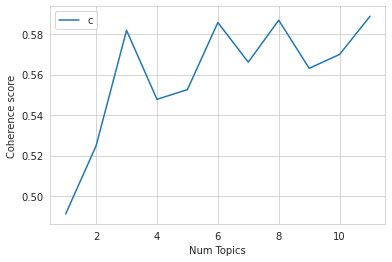

In [ ]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=bow_corpus, texts=processed_docs, start=1, limit=12, step=1)
# Show graph
import matplotlib.pyplot as plt
limit=12; start=1; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

##Determine which of the topics can be combined.

The above plot shows that coherence score increases with the number of topics, with a decline between 3 to 5.Now, choosing the number of topics still depends on specific requirements because topic around 6, 8 and 12 have good coherence scores but may have repeated keywords in the topic. Topic coherence gives us a good picture so that **we can combine 2,6,8 and 12 topics.**

#Create a topic model using LDA with what you think is the optimal number of topics



In [ ]:
lda_model_4_topoics = gensim.models.LdaMulticore(bow_corpus, num_topics=4, id2word=dictionary, passes=2, workers=2)


/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

In [ ]:
lda_model_tfidf_4_topics = gensim.models.LdaMulticore(corpus_tfidf, num_topics=12, id2word=dictionary, passes=2, workers=4)

/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

##What is the coherence of the model?

In [ ]:
# Compute Coherence Score of bow_corpus using c_v
coherence_model_lda = CoherenceModel(model=lda_model_4_topoics, texts=processed_docs, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.5292753937042036


In [ ]:
# Compute Coherence Score of tfidf_corpus using c_v
coherence_model_lda = CoherenceModel(model=lda_model_tfidf_4_topics, texts=processed_docs, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.47102723880238545


#The business should be able to interpret the topics.



##Name each of the identified topics.



In [ ]:
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 1  has Coherence Value of 0.4912
Num Topics = 2  has Coherence Value of 0.5248
Num Topics = 3  has Coherence Value of 0.5818
Num Topics = 4  has Coherence Value of 0.5477
Num Topics = 5  has Coherence Value of 0.5526
Num Topics = 6  has Coherence Value of 0.5857
Num Topics = 7  has Coherence Value of 0.5661
Num Topics = 8  has Coherence Value of 0.5868
Num Topics = 9  has Coherence Value of 0.5631
Num Topics = 10  has Coherence Value of 0.5699
Num Topics = 11  has Coherence Value of 0.5888


##Create a table with the topic name and the top 10 terms in each to present to the business.

In [ ]:
def format_topics_sentences(ldamodel=lda_model, corpus=bow_corpus, texts=processed_docs):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)



In [ ]:

df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=bow_corpus, texts=processed_docs)


In [ ]:

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Topic_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']



In [ ]:
# Show the top 10 terms 
df_dominant_topic.head(10)

Topic_No  ...                                               Text
0         0  ...                        [good, need, updat, improv]
1         1  ...  [worst, mobil, buy, batteri, drain, like, hell...
2         2  ...                                    [cash, januari]
3         3  ...                                             [good]
4         4  ...  [worst, phone, everthey, chang, phone, problem...
5         5  ...  [tell, buyi, total, batterypoor, camerawast, m...
6         6  ...  [phone, awesom, charg, heat, allot, genuin, re...
7         7  ...                             [batteri, level, wear]
8         8  ...  [hit, problem, phone, hang, problem, lenovo, n...
9         9  ...              [glitch, dont, thing, better, option]

[10 rows x 5 columns]

In [ ]:
import torch

In [ ]:
x = torch.Size([5, 4, 6, 2, 2])

In [ ]:
x

torch.Size([5, 4, 6, 2, 2])

In [ ]:
torch.squeeze(x)

TypeError: ignored

In [ ]:
x9 = torch.zeros(2, 1, 3, 1, 5)
print('Tensor:')
print(x9)


Tensor:
tensor([[[[[0., 0., 0., 0., 0.]],

          [[0., 0., 0., 0., 0.]],

          [[0., 0., 0., 0., 0.]]]],



        [[[[0., 0., 0., 0., 0.]],

          [[0., 0., 0., 0., 0.]],

          [[0., 0., 0., 0., 0.]]]]])


In [ ]:
x9 = torch.zeros(5, 4, 6, 2, 2)
print('Tensor:')
print(x9)

Tensor:
tensor([[[[[0., 0.],
           [0., 0.]],

          [[0., 0.],
           [0., 0.]],

          [[0., 0.],
           [0., 0.]],

          [[0., 0.],
           [0., 0.]],

          [[0., 0.],
           [0., 0.]],

          [[0., 0.],
           [0., 0.]]],


         [[[0., 0.],
           [0., 0.]],

          [[0., 0.],
           [0., 0.]],

          [[0., 0.],
           [0., 0.]],

          [[0., 0.],
           [0., 0.]],

          [[0., 0.],
           [0., 0.]],

          [[0., 0.],
           [0., 0.]]],


         [[[0., 0.],
           [0., 0.]],

          [[0., 0.],
           [0., 0.]],

          [[0., 0.],
           [0., 0.]],

          [[0., 0.],
           [0., 0.]],

          [[0., 0.],
           [0., 0.]],

          [[0., 0.],
           [0., 0.]]],


         [[[0., 0.],
           [0., 0.]],

          [[0., 0.],
           [0., 0.]],

          [[0., 0.],
           [0., 0.]],

          [[0., 0.],
           [0., 0.]],

          [[0., 0.

In [ ]:
print('\nTensor shape:')
print(x9.shape)


Tensor shape:
torch.Size([5, 4, 6, 2, 2])


In [ ]:
print('\nTensor after torch.squeeze():')
print(x9.squeeze())



Tensor after torch.squeeze():
tensor([[[[[0., 0.],
           [0., 0.]],

          [[0., 0.],
           [0., 0.]],

          [[0., 0.],
           [0., 0.]],

          [[0., 0.],
           [0., 0.]],

          [[0., 0.],
           [0., 0.]],

          [[0., 0.],
           [0., 0.]]],


         [[[0., 0.],
           [0., 0.]],

          [[0., 0.],
           [0., 0.]],

          [[0., 0.],
           [0., 0.]],

          [[0., 0.],
           [0., 0.]],

          [[0., 0.],
           [0., 0.]],

          [[0., 0.],
           [0., 0.]]],


         [[[0., 0.],
           [0., 0.]],

          [[0., 0.],
           [0., 0.]],

          [[0., 0.],
           [0., 0.]],

          [[0., 0.],
           [0., 0.]],

          [[0., 0.],
           [0., 0.]],

          [[0., 0.],
           [0., 0.]]],


         [[[0., 0.],
           [0., 0.]],

          [[0., 0.],
           [0., 0.]],

          [[0., 0.],
           [0., 0.]],

          [[0., 0.],
           [0., 0.

In [ ]:
print('\nTensor shape after torch.squeeze():')
print(x9.squeeze().shape)


Tensor shape after torch.squeeze():
torch.Size([5, 4, 6, 2, 2])
